In [1]:
import models
import model_setup
import numpy as np
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import random_split, DataLoader
from tqdm import tqdm
from itertools import product
from datetime import datetime
from torchvision import transforms

# Setup data

In [2]:
# Load new data
loader = model_setup.load_data(max_files=30_000)
# torch.save(loader, "preprocessed_data_30_000.pt")

# Load from preprocessed data
# preprocessed_data_path = "preprocessed_data_30_000.pt"
# loader = torch.load(preprocessed_data_path)

Processing Data: 100%|██████████| 30000/30000 [01:23<00:00, 361.06image/s]


Split the data into training, testing, and validation sets

In [3]:
train_subset, test_subset, val_subset = random_split(loader.dataset,[0.7,0.2,0.1])
val_size = len(val_subset.indices)
del loader

In [4]:
train_transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.RandomRotation(degrees=15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
            transforms.GaussianBlur(kernel_size=3),
            transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=15),
            transforms.ToTensor()
            # Add any additional preprocessing steps here
        ])

for idx in tqdm(train_subset.indices, total=len(train_subset.indices)):
    input, label = train_subset.dataset.data[idx]
    new_input = train_transform(input)
    train_subset.dataset.data[idx] = (new_input, label)


100%|██████████| 21000/21000 [04:31<00:00, 77.38it/s]


In [5]:
train = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
test = DataLoader(test_subset,batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val = DataLoader(val_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

# Training

Make a parameter grid

In [6]:
param_grid = {
    'filters': [32, 64, 128],
    'num_conv_layers': [2, 4, 8]
}

# Get all combinations of parameters
combinations = list(product(*param_grid.values()))
combinations

[(32, 1),
 (32, 2),
 (32, 4),
 (64, 1),
 (64, 2),
 (64, 4),
 (128, 1),
 (128, 2),
 (128, 4)]

Train all combinations

In [7]:
saved_models = []

for filters, num_layers in combinations:
    print("--------------------------------------------------------")
    print(f"Testing with \"{filters} filters\" and \"{num_layers} layers\"")
    model = models.HandDetectionModel(filters, num_layers)
    model.train_model(train, test, epochs=50, early_stopping_patience=10)
    torch.save(model.state_dict(), f"models/model_{filters}_{num_layers}_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt")
    saved_models.append(model)

--------------------------------------------------------
Testing with "32 filters" and "1 layers"


Epoch 1/50 (Training): 100%|██████████| 657/657 [01:21<00:00,  8.04it/s]


Loss: 1.0991, Validation Accuracy: 0.3438, Time remaining: 1:17:41.900621


Epoch 2/50 (Training): 100%|██████████| 657/657 [00:36<00:00, 17.93it/s]


Loss: 1.0983, Validation Accuracy: 0.3447, Time remaining: 0:57:45.359568


Epoch 3/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.41it/s]


Loss: 1.0977, Validation Accuracy: 0.3600, Time remaining: 0:49:40.867041


Epoch 4/50 (Training): 100%|██████████| 657/657 [00:35<00:00, 18.26it/s]


Loss: 1.0971, Validation Accuracy: 0.3550, Time remaining: 0:45:42.227210


Epoch 5/50 (Training): 100%|██████████| 657/657 [00:35<00:00, 18.75it/s]


Loss: 1.0965, Validation Accuracy: 0.3700, Time remaining: 0:42:53.294805


Epoch 6/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.55it/s]


Loss: 1.0959, Validation Accuracy: 0.3715, Time remaining: 0:40:32.247664


Epoch 7/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.54it/s]


Loss: 1.0953, Validation Accuracy: 0.3880, Time remaining: 0:38:37.729068


Epoch 8/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.47it/s]


Loss: 1.0945, Validation Accuracy: 0.4017, Time remaining: 0:37:01.624902


Epoch 9/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.69it/s]


Loss: 1.0936, Validation Accuracy: 0.3997, Time remaining: 0:35:33.801991


Epoch 10/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.72it/s]


Loss: 1.0928, Validation Accuracy: 0.4050, Time remaining: 0:34:15.322440


Epoch 11/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.74it/s]


Loss: 1.0918, Validation Accuracy: 0.3928, Time remaining: 0:33:02.328036


Epoch 12/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.87it/s]


Loss: 1.0908, Validation Accuracy: 0.3790, Time remaining: 0:31:53.454394


Epoch 13/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.71it/s]


Loss: 1.0896, Validation Accuracy: 0.4155, Time remaining: 0:30:48.522997


Epoch 14/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.78it/s]


Loss: 1.0885, Validation Accuracy: 0.4183, Time remaining: 0:29:46.557780


Epoch 15/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.69it/s]


Loss: 1.0874, Validation Accuracy: 0.4123, Time remaining: 0:28:47.050185


Epoch 16/50 (Training): 100%|██████████| 657/657 [00:32<00:00, 19.93it/s]


Loss: 1.0859, Validation Accuracy: 0.4207, Time remaining: 0:27:48.459152


Epoch 17/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.56it/s]


Loss: 1.0848, Validation Accuracy: 0.4090, Time remaining: 0:26:52.859127


Epoch 18/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.75it/s]


Loss: 1.0833, Validation Accuracy: 0.3975, Time remaining: 0:25:57.708768


Epoch 19/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.63it/s]


Loss: 1.0821, Validation Accuracy: 0.4057, Time remaining: 0:25:04.131346


Epoch 20/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.74it/s]


Loss: 1.0809, Validation Accuracy: 0.4135, Time remaining: 0:24:11.031000


Epoch 21/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.59it/s]


Loss: 1.0806, Validation Accuracy: 0.4133, Time remaining: 0:23:18.628646


Epoch 22/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.71it/s]


Loss: 1.0795, Validation Accuracy: 0.4123, Time remaining: 0:22:26.743524


Epoch 23/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.50it/s]


Loss: 1.0789, Validation Accuracy: 0.4073, Time remaining: 0:21:35.990469


Epoch 24/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.83it/s]


Loss: 1.0785, Validation Accuracy: 0.4098, Time remaining: 0:20:44.815286


Epoch 25/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.79it/s]


Loss: 1.0782, Validation Accuracy: 0.4120, Time remaining: 0:19:54.198575


Epoch 26/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.86it/s]


Loss: 1.0779, Validation Accuracy: 0.4087, Time remaining: 0:19:03.973776
Early stopping at epoch 26 due to no improvement in validation accuracy.
Best Validation Accuracy: 0.4207 at epoch 16
--------------------------------------------------------
Testing with "32 filters" and "2 layers"


Epoch 1/50 (Training): 100%|██████████| 657/657 [00:36<00:00, 17.81it/s]


Loss: 1.0954, Validation Accuracy: 0.4283, Time remaining: 0:40:07.092513


Epoch 2/50 (Training): 100%|██████████| 657/657 [00:35<00:00, 18.65it/s]


Loss: 1.0768, Validation Accuracy: 0.4378, Time remaining: 0:38:36.672960


Epoch 3/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.79it/s]


Loss: 1.0592, Validation Accuracy: 0.4350, Time remaining: 0:37:29.189465


Epoch 4/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 19.07it/s]


Loss: 1.0449, Validation Accuracy: 0.4627, Time remaining: 0:36:27.760000


Epoch 5/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.92it/s]


Loss: 1.0317, Validation Accuracy: 0.4590, Time remaining: 0:35:33.661320


Epoch 6/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.92it/s]


Loss: 1.0212, Validation Accuracy: 0.4868, Time remaining: 0:34:41.648228


Epoch 7/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.85it/s]


Loss: 1.0125, Validation Accuracy: 0.4697, Time remaining: 0:33:52.492653


Epoch 8/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.99it/s]


Loss: 1.0067, Validation Accuracy: 0.4852, Time remaining: 0:33:01.463064


Epoch 9/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 19.10it/s]


Loss: 0.9963, Validation Accuracy: 0.4923, Time remaining: 0:32:11.891464


Epoch 10/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.92it/s]


Loss: 0.9913, Validation Accuracy: 0.4882, Time remaining: 0:31:23.043960


Epoch 11/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 19.01it/s]


Loss: 0.9876, Validation Accuracy: 0.5015, Time remaining: 0:30:35.117115


Epoch 12/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.92it/s]


Loss: 0.9856, Validation Accuracy: 0.4900, Time remaining: 0:29:47.139430


Epoch 13/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.94it/s]


Loss: 0.9797, Validation Accuracy: 0.4920, Time remaining: 0:28:59.560513


Epoch 14/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.86it/s]


Loss: 0.9749, Validation Accuracy: 0.5095, Time remaining: 0:28:12.537840


Epoch 15/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.87it/s]


Loss: 0.9714, Validation Accuracy: 0.5070, Time remaining: 0:27:25.705215


Epoch 16/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.86it/s]


Loss: 0.9670, Validation Accuracy: 0.5083, Time remaining: 0:26:38.383962


Epoch 17/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 19.01it/s]


Loss: 0.9653, Validation Accuracy: 0.5097, Time remaining: 0:25:50.580636


Epoch 18/50 (Training): 100%|██████████| 657/657 [00:35<00:00, 18.76it/s]


Loss: 0.9607, Validation Accuracy: 0.5162, Time remaining: 0:25:03.858528


Epoch 19/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.96it/s]


Loss: 0.9592, Validation Accuracy: 0.5163, Time remaining: 0:24:16.474860


Epoch 20/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.84it/s]


Loss: 0.9574, Validation Accuracy: 0.5122, Time remaining: 0:23:29.735820


Epoch 21/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.90it/s]


Loss: 0.9529, Validation Accuracy: 0.5267, Time remaining: 0:22:42.549949


Epoch 22/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.97it/s]


Loss: 0.9532, Validation Accuracy: 0.5070, Time remaining: 0:21:55.294680


Epoch 23/50 (Training): 100%|██████████| 657/657 [00:35<00:00, 18.72it/s]


Loss: 0.9528, Validation Accuracy: 0.4985, Time remaining: 0:21:08.413398


Epoch 24/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.83it/s]


Loss: 0.9461, Validation Accuracy: 0.5163, Time remaining: 0:20:21.632516


Epoch 25/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.86it/s]


Loss: 0.9428, Validation Accuracy: 0.5253, Time remaining: 0:19:34.572150


Epoch 26/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.94it/s]


Loss: 0.9403, Validation Accuracy: 0.5260, Time remaining: 0:18:47.428824


Epoch 27/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.92it/s]


Loss: 0.9396, Validation Accuracy: 0.5270, Time remaining: 0:18:00.317613


Epoch 28/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.98it/s]


Loss: 0.9401, Validation Accuracy: 0.5165, Time remaining: 0:17:13.103478


Epoch 29/50 (Training): 100%|██████████| 657/657 [00:35<00:00, 18.73it/s]


Loss: 0.9376, Validation Accuracy: 0.5292, Time remaining: 0:16:26.392953


Epoch 30/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.92it/s]


Loss: 0.9354, Validation Accuracy: 0.5223, Time remaining: 0:15:39.347820


Epoch 31/50 (Training): 100%|██████████| 657/657 [00:35<00:00, 18.65it/s]


Loss: 0.9360, Validation Accuracy: 0.5217, Time remaining: 0:14:52.627391


Epoch 32/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 19.05it/s]


Loss: 0.9368, Validation Accuracy: 0.5230, Time remaining: 0:14:05.543412


Epoch 33/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.94it/s]


Loss: 0.9319, Validation Accuracy: 0.5207, Time remaining: 0:13:18.441125


Epoch 34/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.92it/s]


Loss: 0.9303, Validation Accuracy: 0.5347, Time remaining: 0:12:31.340880


Epoch 35/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.91it/s]


Loss: 0.9309, Validation Accuracy: 0.5385, Time remaining: 0:11:44.320110


Epoch 36/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.98it/s]


Loss: 0.9297, Validation Accuracy: 0.5335, Time remaining: 0:10:57.259344


Epoch 37/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.90it/s]


Loss: 0.9297, Validation Accuracy: 0.5273, Time remaining: 0:10:10.308426


Epoch 38/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.90it/s]


Loss: 0.9287, Validation Accuracy: 0.5298, Time remaining: 0:09:23.351280


Epoch 39/50 (Training): 100%|██████████| 657/657 [00:35<00:00, 18.70it/s]


Loss: 0.9285, Validation Accuracy: 0.5297, Time remaining: 0:08:36.498587


Epoch 40/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.99it/s]


Loss: 0.9271, Validation Accuracy: 0.5318, Time remaining: 0:07:49.507760


Epoch 41/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.81it/s]


Loss: 0.9273, Validation Accuracy: 0.5323, Time remaining: 0:07:02.616861


Epoch 42/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.87it/s]


Loss: 0.9276, Validation Accuracy: 0.5328, Time remaining: 0:06:15.648160


Epoch 43/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.83it/s]


Loss: 0.9251, Validation Accuracy: 0.5325, Time remaining: 0:05:28.694457


Epoch 44/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.91it/s]


Loss: 0.9253, Validation Accuracy: 0.5313, Time remaining: 0:04:41.725782


Epoch 45/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 18.86it/s]


Loss: 0.9263, Validation Accuracy: 0.5325, Time remaining: 0:03:54.782240
Early stopping at epoch 45 due to no improvement in validation accuracy.
Best Validation Accuracy: 0.5385 at epoch 35
--------------------------------------------------------
Testing with "32 filters" and "4 layers"


Epoch 1/50 (Training): 100%|██████████| 657/657 [01:15<00:00,  8.65it/s]


Loss: 1.0738, Validation Accuracy: 0.4727, Time remaining: 1:11:56.678667


Epoch 2/50 (Training): 100%|██████████| 657/657 [01:16<00:00,  8.56it/s]


Loss: 1.0344, Validation Accuracy: 0.4925, Time remaining: 1:10:49.317264


Epoch 3/50 (Training): 100%|██████████| 657/657 [01:16<00:00,  8.59it/s]


Loss: 1.0057, Validation Accuracy: 0.4620, Time remaining: 1:09:21.298878


Epoch 4/50 (Training): 100%|██████████| 657/657 [01:16<00:00,  8.55it/s]


Loss: 0.9921, Validation Accuracy: 0.4925, Time remaining: 1:07:56.352146


Epoch 5/50 (Training): 100%|██████████| 657/657 [01:17<00:00,  8.51it/s]


Loss: 0.9793, Validation Accuracy: 0.5128, Time remaining: 1:06:36.137790


Epoch 6/50 (Training): 100%|██████████| 657/657 [01:16<00:00,  8.57it/s]


Loss: 0.9723, Validation Accuracy: 0.5080, Time remaining: 1:05:07.847372


Epoch 7/50 (Training): 100%|██████████| 657/657 [01:16<00:00,  8.55it/s]


Loss: 0.9660, Validation Accuracy: 0.5015, Time remaining: 1:03:41.400798


Epoch 8/50 (Training): 100%|██████████| 657/657 [01:16<00:00,  8.55it/s]


Loss: 0.9608, Validation Accuracy: 0.5145, Time remaining: 1:02:13.238292


Epoch 9/50 (Training): 100%|██████████| 657/657 [01:16<00:00,  8.55it/s]


Loss: 0.9522, Validation Accuracy: 0.5195, Time remaining: 1:00:45.697122


Epoch 10/50 (Training): 100%|██████████| 657/657 [01:17<00:00,  8.50it/s]


Loss: 0.9456, Validation Accuracy: 0.5225, Time remaining: 0:59:19.287280


Epoch 11/50 (Training): 100%|██████████| 657/657 [01:17<00:00,  8.50it/s]


Loss: 0.9405, Validation Accuracy: 0.4915, Time remaining: 0:57:52.053546


Epoch 12/50 (Training): 100%|██████████| 657/657 [01:17<00:00,  8.51it/s]


Loss: 0.9360, Validation Accuracy: 0.5218, Time remaining: 0:56:24.953018


Epoch 13/50 (Training): 100%|██████████| 657/657 [01:17<00:00,  8.46it/s]


Loss: 0.9264, Validation Accuracy: 0.5235, Time remaining: 0:54:58.183885


Epoch 14/50 (Training): 100%|██████████| 657/657 [01:17<00:00,  8.48it/s]


Loss: 0.9126, Validation Accuracy: 0.5442, Time remaining: 0:53:30.491952


Epoch 15/50 (Training): 100%|██████████| 657/657 [01:17<00:00,  8.50it/s]


Loss: 0.9057, Validation Accuracy: 0.5407, Time remaining: 0:52:02.412860


Epoch 16/50 (Training): 100%|██████████| 657/657 [01:17<00:00,  8.42it/s]


Loss: 0.8981, Validation Accuracy: 0.5423, Time remaining: 0:50:35.254052


Epoch 17/50 (Training): 100%|██████████| 657/657 [01:17<00:00,  8.44it/s]


Loss: 0.8883, Validation Accuracy: 0.5657, Time remaining: 0:49:08.350185


Epoch 18/50 (Training): 100%|██████████| 657/657 [01:18<00:00,  8.33it/s]


Loss: 0.8774, Validation Accuracy: 0.5572, Time remaining: 0:47:42.781408


Epoch 19/50 (Training): 100%|██████████| 657/657 [01:19<00:00,  8.31it/s]


Loss: 0.8730, Validation Accuracy: 0.5640, Time remaining: 0:46:16.392302


Epoch 20/50 (Training): 100%|██████████| 657/657 [01:18<00:00,  8.34it/s]


Loss: 0.8678, Validation Accuracy: 0.5548, Time remaining: 0:44:48.973860


Epoch 21/50 (Training): 100%|██████████| 657/657 [01:18<00:00,  8.36it/s]


Loss: 0.8561, Validation Accuracy: 0.5758, Time remaining: 0:43:21.127972


Epoch 22/50 (Training): 100%|██████████| 657/657 [01:19<00:00,  8.31it/s]


Loss: 0.8489, Validation Accuracy: 0.5600, Time remaining: 0:41:54.133552


Epoch 23/50 (Training): 100%|██████████| 657/657 [01:18<00:00,  8.34it/s]


Loss: 0.8493, Validation Accuracy: 0.5653, Time remaining: 0:40:25.838328


Epoch 24/50 (Training): 100%|██████████| 657/657 [01:18<00:00,  8.33it/s]


Loss: 0.8461, Validation Accuracy: 0.5727, Time remaining: 0:38:57.535954


Epoch 25/50 (Training): 100%|██████████| 657/657 [01:18<00:00,  8.32it/s]


Loss: 0.8393, Validation Accuracy: 0.5712, Time remaining: 0:37:28.791400


Epoch 26/50 (Training): 100%|██████████| 657/657 [01:19<00:00,  8.31it/s]


Loss: 0.8354, Validation Accuracy: 0.5805, Time remaining: 0:36:00.179688


Epoch 27/50 (Training): 100%|██████████| 657/657 [01:18<00:00,  8.35it/s]


Loss: 0.8325, Validation Accuracy: 0.5728, Time remaining: 0:34:31.018624


Epoch 28/50 (Training): 100%|██████████| 657/657 [01:18<00:00,  8.33it/s]


Loss: 0.8343, Validation Accuracy: 0.5818, Time remaining: 0:33:01.772804


Epoch 29/50 (Training): 100%|██████████| 657/657 [01:19<00:00,  8.30it/s]


Loss: 0.8338, Validation Accuracy: 0.5752, Time remaining: 0:31:32.678109


Epoch 30/50 (Training): 100%|██████████| 657/657 [01:19<00:00,  8.23it/s]


Loss: 0.8295, Validation Accuracy: 0.5808, Time remaining: 0:30:03.881660


Epoch 31/50 (Training): 100%|██████████| 657/657 [01:20<00:00,  8.16it/s]


Loss: 0.8267, Validation Accuracy: 0.5833, Time remaining: 0:28:35.329690


Epoch 32/50 (Training): 100%|██████████| 657/657 [01:20<00:00,  8.17it/s]


Loss: 0.8259, Validation Accuracy: 0.5937, Time remaining: 0:27:06.439176


Epoch 33/50 (Training): 100%|██████████| 657/657 [01:20<00:00,  8.14it/s]


Loss: 0.8236, Validation Accuracy: 0.5863, Time remaining: 0:25:37.443008


Epoch 34/50 (Training): 100%|██████████| 657/657 [01:19<00:00,  8.25it/s]


Loss: 0.8230, Validation Accuracy: 0.5827, Time remaining: 0:24:07.742576


Epoch 35/50 (Training): 100%|██████████| 657/657 [01:19<00:00,  8.30it/s]


Loss: 0.8209, Validation Accuracy: 0.5922, Time remaining: 0:22:37.706760


Epoch 36/50 (Training): 100%|██████████| 657/657 [01:19<00:00,  8.31it/s]


Loss: 0.8182, Validation Accuracy: 0.5830, Time remaining: 0:21:07.475076


Epoch 37/50 (Training): 100%|██████████| 657/657 [01:18<00:00,  8.36it/s]


Loss: 0.8169, Validation Accuracy: 0.5793, Time remaining: 0:19:37.059377


Epoch 38/50 (Training): 100%|██████████| 657/657 [01:19<00:00,  8.26it/s]


Loss: 0.8130, Validation Accuracy: 0.5858, Time remaining: 0:18:06.932988


Epoch 39/50 (Training): 100%|██████████| 657/657 [01:18<00:00,  8.35it/s]


Loss: 0.8146, Validation Accuracy: 0.5837, Time remaining: 0:16:36.450202


Epoch 40/50 (Training): 100%|██████████| 657/657 [01:18<00:00,  8.33it/s]


Loss: 0.8107, Validation Accuracy: 0.5865, Time remaining: 0:15:05.960960


Epoch 41/50 (Training): 100%|██████████| 657/657 [01:18<00:00,  8.35it/s]


Loss: 0.8102, Validation Accuracy: 0.5878, Time remaining: 0:13:35.446413


Epoch 42/50 (Training): 100%|██████████| 657/657 [01:19<00:00,  8.30it/s]


Loss: 0.8106, Validation Accuracy: 0.5890, Time remaining: 0:12:05.085088
Early stopping at epoch 42 due to no improvement in validation accuracy.
Best Validation Accuracy: 0.5937 at epoch 32
--------------------------------------------------------
Testing with "64 filters" and "1 layers"


Epoch 1/50 (Training): 100%|██████████| 657/657 [00:35<00:00, 18.47it/s]


Loss: 1.0984, Validation Accuracy: 0.3268, Time remaining: 0:39:02.056626


Epoch 2/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.53it/s]


Loss: 1.0973, Validation Accuracy: 0.3808, Time remaining: 0:37:23.327184


Epoch 3/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.55it/s]


Loss: 1.0962, Validation Accuracy: 0.3832, Time remaining: 0:36:19.236263


Epoch 4/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.68it/s]


Loss: 1.0953, Validation Accuracy: 0.3768, Time remaining: 0:35:20.870250


Epoch 5/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.57it/s]


Loss: 1.0945, Validation Accuracy: 0.3683, Time remaining: 0:34:30.775080


Epoch 6/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.57it/s]


Loss: 1.0931, Validation Accuracy: 0.3825, Time remaining: 0:33:42.443192


Epoch 7/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.78it/s]


Loss: 1.0921, Validation Accuracy: 0.3977, Time remaining: 0:32:52.915035


Epoch 8/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 19.13it/s]


Loss: 1.0916, Validation Accuracy: 0.3957, Time remaining: 0:32:09.458118


Epoch 9/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.71it/s]


Loss: 1.0907, Validation Accuracy: 0.3782, Time remaining: 0:31:21.224156


Epoch 10/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.87it/s]


Loss: 1.0902, Validation Accuracy: 0.3940, Time remaining: 0:30:32.009200


Epoch 11/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.87it/s]


Loss: 1.0894, Validation Accuracy: 0.3828, Time remaining: 0:29:44.207880


Epoch 12/50 (Training): 100%|██████████| 657/657 [00:32<00:00, 19.95it/s]


Loss: 1.0890, Validation Accuracy: 0.3817, Time remaining: 0:28:55.854516


Epoch 13/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.82it/s]


Loss: 1.0886, Validation Accuracy: 0.3853, Time remaining: 0:28:08.541435


Epoch 14/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.83it/s]


Loss: 1.0882, Validation Accuracy: 0.3842, Time remaining: 0:27:21.701484


Epoch 15/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.90it/s]


Loss: 1.0881, Validation Accuracy: 0.3875, Time remaining: 0:26:34.596605


Epoch 16/50 (Training): 100%|██████████| 657/657 [00:33<00:00, 19.35it/s]


Loss: 1.0878, Validation Accuracy: 0.3848, Time remaining: 0:25:50.843258


Epoch 17/50 (Training): 100%|██████████| 657/657 [00:34<00:00, 19.11it/s]


Loss: 1.0877, Validation Accuracy: 0.3862, Time remaining: 0:25:06.941799
Early stopping at epoch 17 due to no improvement in validation accuracy.
Best Validation Accuracy: 0.3977 at epoch 7
--------------------------------------------------------
Testing with "64 filters" and "2 layers"


Epoch 1/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.61it/s]


Loss: 1.0856, Validation Accuracy: 0.4333, Time remaining: 1:05:56.826881


Epoch 2/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.66it/s]


Loss: 1.0548, Validation Accuracy: 0.4437, Time remaining: 1:04:31.522464


Epoch 3/50 (Training): 100%|██████████| 657/657 [01:07<00:00,  9.69it/s]


Loss: 1.0323, Validation Accuracy: 0.4705, Time remaining: 1:03:05.221845


Epoch 4/50 (Training): 100%|██████████| 657/657 [01:07<00:00,  9.68it/s]


Loss: 1.0126, Validation Accuracy: 0.4868, Time remaining: 1:01:43.461288


Epoch 5/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.66it/s]


Loss: 1.0014, Validation Accuracy: 0.4740, Time remaining: 1:00:20.576565


Epoch 6/50 (Training): 100%|██████████| 657/657 [01:07<00:00,  9.67it/s]


Loss: 0.9956, Validation Accuracy: 0.5005, Time remaining: 0:58:59.053496


Epoch 7/50 (Training): 100%|██████████| 657/657 [01:07<00:00,  9.66it/s]


Loss: 0.9824, Validation Accuracy: 0.4902, Time remaining: 0:57:38.749118


Epoch 8/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.64it/s]


Loss: 0.9781, Validation Accuracy: 0.5085, Time remaining: 0:56:18.036060


Epoch 9/50 (Training): 100%|██████████| 657/657 [01:07<00:00,  9.67it/s]


Loss: 0.9703, Validation Accuracy: 0.5212, Time remaining: 0:54:56.873796


Epoch 10/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.60it/s]


Loss: 0.9689, Validation Accuracy: 0.5137, Time remaining: 0:53:37.231960


Epoch 11/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.65it/s]


Loss: 0.9631, Validation Accuracy: 0.5155, Time remaining: 0:52:16.389633


Epoch 12/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.63it/s]


Loss: 0.9599, Validation Accuracy: 0.5168, Time remaining: 0:50:56.128796


Epoch 13/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.63it/s]


Loss: 0.9489, Validation Accuracy: 0.5265, Time remaining: 0:49:35.703947


Epoch 14/50 (Training): 100%|██████████| 657/657 [01:07<00:00,  9.68it/s]


Loss: 0.9498, Validation Accuracy: 0.5238, Time remaining: 0:48:14.217120


Epoch 15/50 (Training): 100%|██████████| 657/657 [01:07<00:00,  9.66it/s]


Loss: 0.9445, Validation Accuracy: 0.5272, Time remaining: 0:46:53.759760


Epoch 16/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.63it/s]


Loss: 0.9425, Validation Accuracy: 0.5162, Time remaining: 0:45:33.828140


Epoch 17/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.64it/s]


Loss: 0.9409, Validation Accuracy: 0.5212, Time remaining: 0:44:13.404105


Epoch 18/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.65it/s]


Loss: 0.9388, Validation Accuracy: 0.5163, Time remaining: 0:42:52.881760


Epoch 19/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.66it/s]


Loss: 0.9363, Validation Accuracy: 0.5265, Time remaining: 0:41:32.370829


Epoch 20/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.65it/s]


Loss: 0.9329, Validation Accuracy: 0.5193, Time remaining: 0:40:11.992620


Epoch 21/50 (Training): 100%|██████████| 657/657 [01:07<00:00,  9.69it/s]


Loss: 0.9329, Validation Accuracy: 0.5375, Time remaining: 0:38:51.395434


Epoch 22/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.63it/s]


Loss: 0.9335, Validation Accuracy: 0.5285, Time remaining: 0:37:30.849496


Epoch 23/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.64it/s]


Loss: 0.9326, Validation Accuracy: 0.5190, Time remaining: 0:36:10.610460


Epoch 24/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.65it/s]


Loss: 0.9297, Validation Accuracy: 0.5187, Time remaining: 0:34:50.398518


Epoch 25/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.56it/s]


Loss: 0.9287, Validation Accuracy: 0.5258, Time remaining: 0:33:31.059950


Epoch 26/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.60it/s]


Loss: 0.9288, Validation Accuracy: 0.5257, Time remaining: 0:32:10.998840


Epoch 27/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.62it/s]


Loss: 0.9267, Validation Accuracy: 0.5305, Time remaining: 0:30:50.705649


Epoch 28/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.63it/s]


Loss: 0.9268, Validation Accuracy: 0.5238, Time remaining: 0:29:30.286826


Epoch 29/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.65it/s]


Loss: 0.9251, Validation Accuracy: 0.5287, Time remaining: 0:28:09.601137


Epoch 30/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.65it/s]


Loss: 0.9257, Validation Accuracy: 0.5305, Time remaining: 0:26:49.047920


Epoch 31/50 (Training): 100%|██████████| 657/657 [01:08<00:00,  9.61it/s]


Loss: 0.9256, Validation Accuracy: 0.5310, Time remaining: 0:25:28.675305
Early stopping at epoch 31 due to no improvement in validation accuracy.
Best Validation Accuracy: 0.5375 at epoch 21
--------------------------------------------------------
Testing with "64 filters" and "4 layers"


Epoch 1/50 (Training): 100%|██████████| 657/657 [02:42<00:00,  4.05it/s]


Loss: 1.0747, Validation Accuracy: 0.4647, Time remaining: 2:27:32.970728


Epoch 2/50 (Training): 100%|██████████| 657/657 [02:42<00:00,  4.05it/s]


Loss: 1.0154, Validation Accuracy: 0.4803, Time remaining: 2:24:30.151584


Epoch 3/50 (Training): 100%|██████████| 657/657 [02:42<00:00,  4.04it/s]


Loss: 0.9926, Validation Accuracy: 0.4938, Time remaining: 2:21:37.830864


Epoch 4/50 (Training): 100%|██████████| 657/657 [02:43<00:00,  4.02it/s]


Loss: 0.9778, Validation Accuracy: 0.5090, Time remaining: 2:18:49.616612


Epoch 5/50 (Training): 100%|██████████| 657/657 [02:43<00:00,  4.03it/s]


Loss: 0.9706, Validation Accuracy: 0.5167, Time remaining: 2:15:51.453315


Epoch 6/50 (Training): 100%|██████████| 657/657 [02:43<00:00,  4.03it/s]


Loss: 0.9598, Validation Accuracy: 0.5113, Time remaining: 2:12:52.267512


Epoch 7/50 (Training): 100%|██████████| 657/657 [02:42<00:00,  4.05it/s]


Loss: 0.9550, Validation Accuracy: 0.4962, Time remaining: 2:09:47.290755


Epoch 8/50 (Training): 100%|██████████| 657/657 [02:43<00:00,  4.02it/s]


Loss: 0.9445, Validation Accuracy: 0.5163, Time remaining: 2:06:50.215032


Epoch 9/50 (Training): 100%|██████████| 657/657 [02:43<00:00,  4.01it/s]


Loss: 0.9340, Validation Accuracy: 0.5237, Time remaining: 2:03:54.132546


Epoch 10/50 (Training): 100%|██████████| 657/657 [02:43<00:00,  4.02it/s]


Loss: 0.9302, Validation Accuracy: 0.5162, Time remaining: 2:00:54.790480


Epoch 11/50 (Training): 100%|██████████| 657/657 [02:43<00:00,  4.02it/s]


Loss: 0.9215, Validation Accuracy: 0.5335, Time remaining: 1:57:54.776904


Epoch 12/50 (Training): 100%|██████████| 657/657 [02:43<00:00,  4.03it/s]


Loss: 0.9166, Validation Accuracy: 0.5330, Time remaining: 1:54:53.598772


Epoch 13/50 (Training): 100%|██████████| 657/657 [02:43<00:00,  4.03it/s]


Loss: 0.9092, Validation Accuracy: 0.5320, Time remaining: 1:51:52.302016


Epoch 14/50 (Training): 100%|██████████| 657/657 [02:42<00:00,  4.03it/s]


Loss: 0.9052, Validation Accuracy: 0.5143, Time remaining: 1:48:51.062328


Epoch 15/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.8927, Validation Accuracy: 0.5525, Time remaining: 1:45:46.165910


Epoch 16/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.8871, Validation Accuracy: 0.5338, Time remaining: 1:42:42.426050


Epoch 17/50 (Training): 100%|██████████| 657/657 [02:42<00:00,  4.06it/s]


Loss: 0.8822, Validation Accuracy: 0.5408, Time remaining: 1:39:39.588186


Epoch 18/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.8778, Validation Accuracy: 0.5600, Time remaining: 1:36:36.612864


Epoch 19/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.8735, Validation Accuracy: 0.5562, Time remaining: 1:33:34.909999


Epoch 20/50 (Training): 100%|██████████| 657/657 [02:42<00:00,  4.05it/s]


Loss: 0.8676, Validation Accuracy: 0.5695, Time remaining: 1:30:32.759520


Epoch 21/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.07it/s]


Loss: 0.8616, Validation Accuracy: 0.5627, Time remaining: 1:27:30.339945


Epoch 22/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.8592, Validation Accuracy: 0.5668, Time remaining: 1:24:27.777344


Epoch 23/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.07it/s]


Loss: 0.8562, Validation Accuracy: 0.5745, Time remaining: 1:21:25.401546


Epoch 24/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.8528, Validation Accuracy: 0.5750, Time remaining: 1:18:23.853986


Epoch 25/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.07it/s]


Loss: 0.8482, Validation Accuracy: 0.5787, Time remaining: 1:15:22.258850


Epoch 26/50 (Training): 100%|██████████| 657/657 [02:42<00:00,  4.05it/s]


Loss: 0.8464, Validation Accuracy: 0.5697, Time remaining: 1:12:21.054720


Epoch 27/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.8442, Validation Accuracy: 0.5732, Time remaining: 1:09:19.510141


Epoch 28/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.07it/s]


Loss: 0.8380, Validation Accuracy: 0.5877, Time remaining: 1:06:17.903754


Epoch 29/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.07it/s]


Loss: 0.8393, Validation Accuracy: 0.5842, Time remaining: 1:03:17.295894


Epoch 30/50 (Training): 100%|██████████| 657/657 [02:42<00:00,  4.05it/s]


Loss: 0.8315, Validation Accuracy: 0.5537, Time remaining: 1:00:16.223480


Epoch 31/50 (Training): 100%|██████████| 657/657 [02:42<00:00,  4.05it/s]


Loss: 0.8261, Validation Accuracy: 0.5798, Time remaining: 0:57:15.465639


Epoch 32/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.8219, Validation Accuracy: 0.5877, Time remaining: 0:54:14.515920


Epoch 33/50 (Training): 100%|██████████| 657/657 [02:42<00:00,  4.05it/s]


Loss: 0.8180, Validation Accuracy: 0.5772, Time remaining: 0:51:13.615929


Epoch 34/50 (Training): 100%|██████████| 657/657 [02:42<00:00,  4.04it/s]


Loss: 0.8154, Validation Accuracy: 0.5903, Time remaining: 0:48:12.914176


Epoch 35/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.8140, Validation Accuracy: 0.5865, Time remaining: 0:45:17.026455


Epoch 36/50 (Training): 100%|██████████| 657/657 [02:42<00:00,  4.05it/s]


Loss: 0.8126, Validation Accuracy: 0.5930, Time remaining: 0:42:16.324294


Epoch 37/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.8101, Validation Accuracy: 0.5952, Time remaining: 0:39:14.789554


Epoch 38/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.07it/s]


Loss: 0.8121, Validation Accuracy: 0.5862, Time remaining: 0:36:13.744332


Epoch 39/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.07it/s]


Loss: 0.8087, Validation Accuracy: 0.5928, Time remaining: 0:33:12.829564


Epoch 40/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.8095, Validation Accuracy: 0.5888, Time remaining: 0:30:11.978360


Epoch 41/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.8027, Validation Accuracy: 0.5967, Time remaining: 0:27:10.495935


Epoch 42/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.07it/s]


Loss: 0.7990, Validation Accuracy: 0.5930, Time remaining: 0:24:09.369080


Epoch 43/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.07it/s]


Loss: 0.8026, Validation Accuracy: 0.5988, Time remaining: 0:21:08.030274


Epoch 44/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.07it/s]


Loss: 0.8002, Validation Accuracy: 0.5955, Time remaining: 0:18:06.705150


Epoch 45/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.07it/s]


Loss: 0.8001, Validation Accuracy: 0.5955, Time remaining: 0:15:05.444865


Epoch 46/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.07it/s]


Loss: 0.7967, Validation Accuracy: 0.5972, Time remaining: 0:12:04.269820


Epoch 47/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.07it/s]


Loss: 0.7954, Validation Accuracy: 0.6002, Time remaining: 0:09:03.138156


Epoch 48/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.7952, Validation Accuracy: 0.5988, Time remaining: 0:06:02.072006


Epoch 49/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.7960, Validation Accuracy: 0.5940, Time remaining: 0:03:01.021096


Epoch 50/50 (Training): 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Loss: 0.7948, Validation Accuracy: 0.6012, Time remaining: 0:00:00
--------------------------------------------------------
Testing with "128 filters" and "1 layers"


Epoch 1/50 (Training): 100%|██████████| 657/657 [00:55<00:00, 11.85it/s]


Loss: 1.0987, Validation Accuracy: 0.3538, Time remaining: 0:56:50.469629


Epoch 2/50 (Training): 100%|██████████| 657/657 [00:49<00:00, 13.37it/s]


Loss: 1.0976, Validation Accuracy: 0.3585, Time remaining: 0:53:20.724000


Epoch 3/50 (Training): 100%|██████████| 657/657 [00:37<00:00, 17.73it/s]


Loss: 1.0969, Validation Accuracy: 0.3850, Time remaining: 0:47:46.227414


Epoch 4/50 (Training): 100%|██████████| 657/657 [00:37<00:00, 17.71it/s]


Loss: 1.0949, Validation Accuracy: 0.3687, Time remaining: 0:44:30.180492


Epoch 5/50 (Training): 100%|██████████| 657/657 [00:38<00:00, 17.25it/s]


Loss: 1.0933, Validation Accuracy: 0.3848, Time remaining: 0:42:23.435055


Epoch 6/50 (Training): 100%|██████████| 657/657 [00:43<00:00, 15.23it/s]


Loss: 1.0915, Validation Accuracy: 0.3803, Time remaining: 0:41:32.439136


Epoch 7/50 (Training): 100%|██████████| 657/657 [00:41<00:00, 15.97it/s]


Loss: 1.0901, Validation Accuracy: 0.3762, Time remaining: 0:40:26.052948


Epoch 8/50 (Training): 100%|██████████| 657/657 [00:37<00:00, 17.48it/s]


Loss: 1.0887, Validation Accuracy: 0.3880, Time remaining: 0:38:55.888674


Epoch 9/50 (Training): 100%|██████████| 657/657 [00:37<00:00, 17.37it/s]


Loss: 1.0874, Validation Accuracy: 0.4028, Time remaining: 0:37:35.499995


Epoch 10/50 (Training): 100%|██████████| 657/657 [00:36<00:00, 17.76it/s]


Loss: 1.0865, Validation Accuracy: 0.4048, Time remaining: 0:36:16.819720


Epoch 11/50 (Training): 100%|██████████| 657/657 [00:37<00:00, 17.40it/s]


Loss: 1.0853, Validation Accuracy: 0.3898, Time remaining: 0:35:06.490893


Epoch 12/50 (Training): 100%|██████████| 657/657 [00:45<00:00, 14.40it/s]


Loss: 1.0842, Validation Accuracy: 0.3935, Time remaining: 0:34:28.841144


Epoch 13/50 (Training): 100%|██████████| 657/657 [00:38<00:00, 17.08it/s]


Loss: 1.0828, Validation Accuracy: 0.4065, Time remaining: 0:33:23.899169


Epoch 14/50 (Training): 100%|██████████| 657/657 [00:38<00:00, 17.19it/s]


Loss: 1.0816, Validation Accuracy: 0.3933, Time remaining: 0:32:20.073156


Epoch 15/50 (Training): 100%|██████████| 657/657 [00:38<00:00, 17.18it/s]


Loss: 1.0801, Validation Accuracy: 0.4025, Time remaining: 0:31:18.351300


Epoch 16/50 (Training): 100%|██████████| 657/657 [00:37<00:00, 17.49it/s]


Loss: 1.0797, Validation Accuracy: 0.3988, Time remaining: 0:30:18.724906


Epoch 17/50 (Training): 100%|██████████| 657/657 [00:37<00:00, 17.64it/s]


Loss: 1.0777, Validation Accuracy: 0.3942, Time remaining: 0:29:18.308838


Epoch 18/50 (Training): 100%|██████████| 657/657 [00:42<00:00, 15.29it/s]


Loss: 1.0772, Validation Accuracy: 0.3933, Time remaining: 0:28:30.330016


Epoch 19/50 (Training): 100%|██████████| 657/657 [00:36<00:00, 17.81it/s]


Loss: 1.0764, Validation Accuracy: 0.3932, Time remaining: 0:27:29.381009


Epoch 20/50 (Training): 100%|██████████| 657/657 [00:37<00:00, 17.63it/s]


Loss: 1.0761, Validation Accuracy: 0.3942, Time remaining: 0:26:30.515430


Epoch 21/50 (Training): 100%|██████████| 657/657 [00:37<00:00, 17.75it/s]


Loss: 1.0755, Validation Accuracy: 0.3977, Time remaining: 0:25:32.158131


Epoch 22/50 (Training): 100%|██████████| 657/657 [00:45<00:00, 14.49it/s]


Loss: 1.0753, Validation Accuracy: 0.3937, Time remaining: 0:24:45.724492


Epoch 23/50 (Training): 100%|██████████| 657/657 [00:38<00:00, 17.03it/s]


Loss: 1.0751, Validation Accuracy: 0.3960, Time remaining: 0:23:50.592354
Early stopping at epoch 23 due to no improvement in validation accuracy.
Best Validation Accuracy: 0.4065 at epoch 13
--------------------------------------------------------
Testing with "128 filters" and "2 layers"


Epoch 1/50 (Training): 100%|██████████| 657/657 [07:31<00:00,  1.45it/s]


Loss: 1.0779, Validation Accuracy: 0.4188, Time remaining: 6:25:28.787724


Epoch 2/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 1.0437, Validation Accuracy: 0.4465, Time remaining: 6:18:49.911504


Epoch 3/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 1.0226, Validation Accuracy: 0.4897, Time remaining: 6:11:18.710405


Epoch 4/50 (Training): 100%|██████████| 657/657 [07:32<00:00,  1.45it/s]


Loss: 1.0027, Validation Accuracy: 0.4790, Time remaining: 6:03:50.990592


Epoch 5/50 (Training): 100%|██████████| 657/657 [07:31<00:00,  1.46it/s]


Loss: 0.9862, Validation Accuracy: 0.5095, Time remaining: 5:56:10.200660


Epoch 6/50 (Training): 100%|██████████| 657/657 [07:31<00:00,  1.46it/s]


Loss: 0.9746, Validation Accuracy: 0.5067, Time remaining: 5:48:02.141544


Epoch 7/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9682, Validation Accuracy: 0.5033, Time remaining: 5:40:07.373526


Epoch 8/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9614, Validation Accuracy: 0.4953, Time remaining: 5:32:13.063962


Epoch 9/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9509, Validation Accuracy: 0.5082, Time remaining: 5:24:21.432116


Epoch 10/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9466, Validation Accuracy: 0.5205, Time remaining: 5:16:18.985160


Epoch 11/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9415, Validation Accuracy: 0.5318, Time remaining: 5:08:22.539393


Epoch 12/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9394, Validation Accuracy: 0.5302, Time remaining: 5:00:39.252384


Epoch 13/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9372, Validation Accuracy: 0.5260, Time remaining: 4:52:57.186145


Epoch 14/50 (Training): 100%|██████████| 657/657 [07:31<00:00,  1.46it/s]


Loss: 0.9315, Validation Accuracy: 0.5302, Time remaining: 4:45:05.589684


Epoch 15/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9263, Validation Accuracy: 0.5250, Time remaining: 4:37:09.075680


Epoch 16/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9254, Validation Accuracy: 0.5322, Time remaining: 4:29:17.987484


Epoch 17/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9229, Validation Accuracy: 0.5285, Time remaining: 4:21:25.013817


Epoch 18/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9242, Validation Accuracy: 0.5328, Time remaining: 4:13:30.933024


Epoch 19/50 (Training): 100%|██████████| 657/657 [07:29<00:00,  1.46it/s]


Loss: 0.9195, Validation Accuracy: 0.5378, Time remaining: 4:05:35.893896


Epoch 20/50 (Training): 100%|██████████| 657/657 [07:29<00:00,  1.46it/s]


Loss: 0.9197, Validation Accuracy: 0.5330, Time remaining: 3:57:39.568740


Epoch 21/50 (Training): 100%|██████████| 657/657 [07:29<00:00,  1.46it/s]


Loss: 0.9194, Validation Accuracy: 0.5248, Time remaining: 3:49:41.613827


Epoch 22/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9169, Validation Accuracy: 0.5397, Time remaining: 3:41:45.696992


Epoch 23/50 (Training): 100%|██████████| 657/657 [07:29<00:00,  1.46it/s]


Loss: 0.9172, Validation Accuracy: 0.5472, Time remaining: 3:33:48.174606


Epoch 24/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9145, Validation Accuracy: 0.5365, Time remaining: 3:25:52.717338


Epoch 25/50 (Training): 100%|██████████| 657/657 [07:29<00:00,  1.46it/s]


Loss: 0.9116, Validation Accuracy: 0.5338, Time remaining: 3:17:57.597125


Epoch 26/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9110, Validation Accuracy: 0.5310, Time remaining: 3:10:02.042664


Epoch 27/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9094, Validation Accuracy: 0.5432, Time remaining: 3:02:07.742888


Epoch 28/50 (Training): 100%|██████████| 657/657 [07:29<00:00,  1.46it/s]


Loss: 0.9081, Validation Accuracy: 0.5435, Time remaining: 2:54:12.092398


Epoch 29/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9062, Validation Accuracy: 0.5495, Time remaining: 2:46:16.988112


Epoch 30/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9050, Validation Accuracy: 0.5448, Time remaining: 2:38:22.451360


Epoch 31/50 (Training): 100%|██████████| 657/657 [07:31<00:00,  1.45it/s]


Loss: 0.9052, Validation Accuracy: 0.5447, Time remaining: 2:30:28.114594


Epoch 32/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9030, Validation Accuracy: 0.5437, Time remaining: 2:22:32.649420


Epoch 33/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9036, Validation Accuracy: 0.5378, Time remaining: 2:14:38.016208


Epoch 34/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.9025, Validation Accuracy: 0.5437, Time remaining: 2:06:42.921296


Epoch 35/50 (Training): 100%|██████████| 657/657 [07:29<00:00,  1.46it/s]


Loss: 0.9017, Validation Accuracy: 0.5472, Time remaining: 1:58:47.972415


Epoch 36/50 (Training): 100%|██████████| 657/657 [07:29<00:00,  1.46it/s]


Loss: 0.9011, Validation Accuracy: 0.5485, Time remaining: 1:50:52.103332


Epoch 37/50 (Training): 100%|██████████| 657/657 [07:29<00:00,  1.46it/s]


Loss: 0.9005, Validation Accuracy: 0.5477, Time remaining: 1:42:57.991131


Epoch 38/50 (Training): 100%|██████████| 657/657 [07:30<00:00,  1.46it/s]


Loss: 0.8992, Validation Accuracy: 0.5438, Time remaining: 1:35:03.383604


Epoch 39/50 (Training): 100%|██████████| 657/657 [07:29<00:00,  1.46it/s]


Loss: 0.8997, Validation Accuracy: 0.5448, Time remaining: 1:27:08.451712
Early stopping at epoch 39 due to no improvement in validation accuracy.
Best Validation Accuracy: 0.5495 at epoch 29
--------------------------------------------------------
Testing with "128 filters" and "4 layers"


Epoch 1/50 (Training): 100%|██████████| 657/657 [1:28:59<00:00,  8.13s/it]


Loss: 1.0476, Validation Accuracy: 0.4567, Time remaining: 3 days, 1:15:27.781625


Epoch 2/50 (Training): 100%|██████████| 657/657 [1:28:50<00:00,  8.11s/it]


Loss: 1.0026, Validation Accuracy: 0.5028, Time remaining: 2 days, 23:43:00.018528


Epoch 3/50 (Training): 100%|██████████| 657/657 [1:28:48<00:00,  8.11s/it]


Loss: 0.9831, Validation Accuracy: 0.4888, Time remaining: 2 days, 22:12:29.239236


Epoch 4/50 (Training):  33%|███▎      | 216/657 [29:26<1:00:07,  8.18s/it]


KeyboardInterrupt: 

# Validation

--------------------------------------------------------
Validating with "1 filters" and "32 layers"


Evaluating: 100%|██████████| 94/94 [00:26<00:00,  3.51it/s]


Accuracy: 39.07%


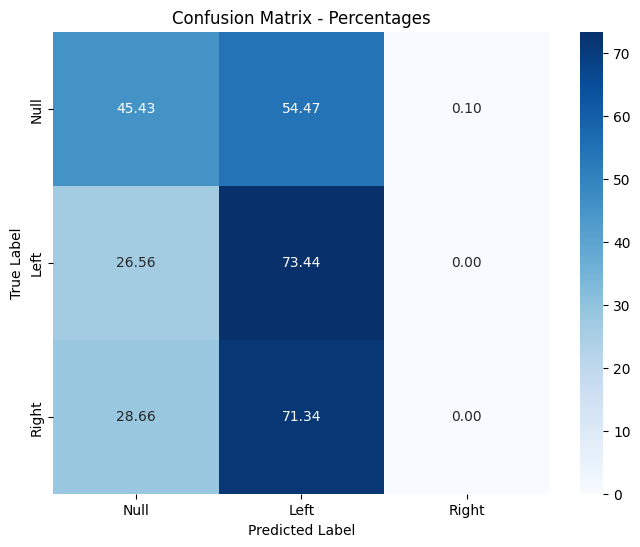

--------------------------------------------------------
Validating with "2 filters" and "32 layers"


Evaluating: 100%|██████████| 94/94 [00:05<00:00, 16.27it/s]

Accuracy: 52.80%


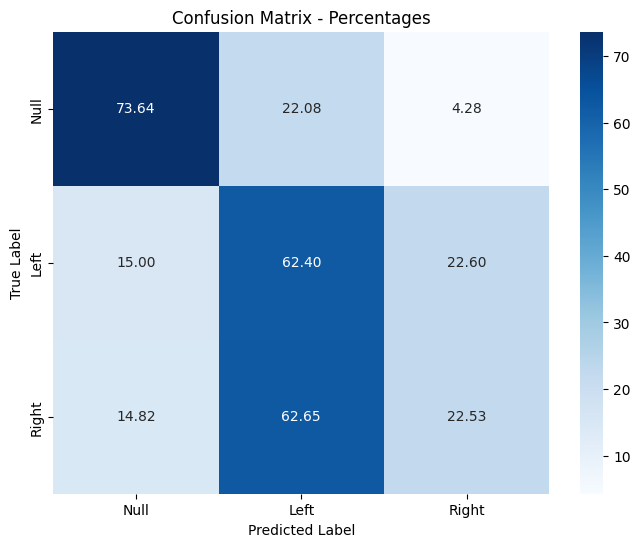

--------------------------------------------------------
Validating with "4 filters" and "32 layers"


Evaluating: 100%|██████████| 94/94 [00:07<00:00, 13.10it/s]

Accuracy: 58.10%


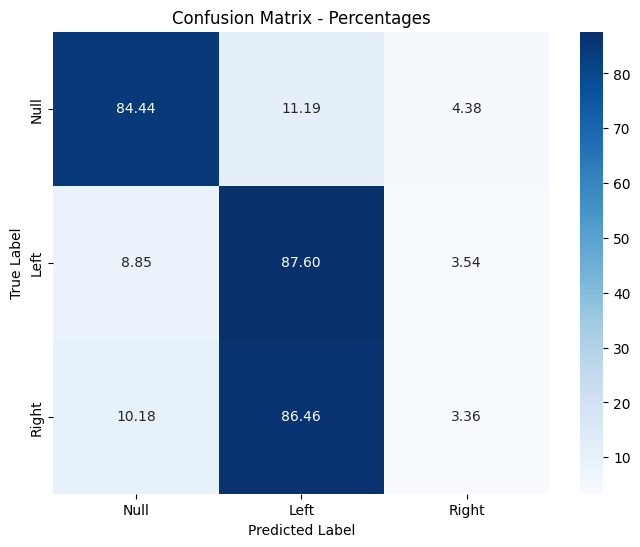

--------------------------------------------------------
Validating with "1 filters" and "64 layers"


Evaluating: 100%|██████████| 94/94 [00:04<00:00, 19.65it/s]


Accuracy: 37.00%


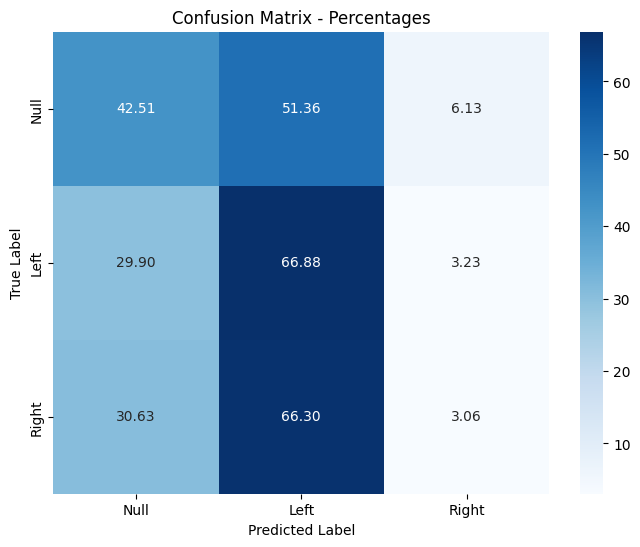

--------------------------------------------------------
Validating with "2 filters" and "64 layers"


Evaluating: 100%|██████████| 94/94 [00:07<00:00, 12.99it/s]

Accuracy: 53.00%


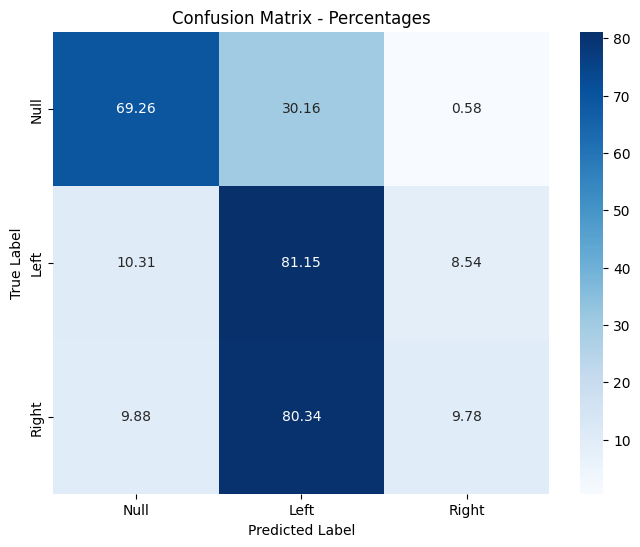

--------------------------------------------------------
Validating with "4 filters" and "64 layers"


Evaluating: 100%|██████████| 94/94 [00:11<00:00,  8.42it/s]

Accuracy: 60.83%


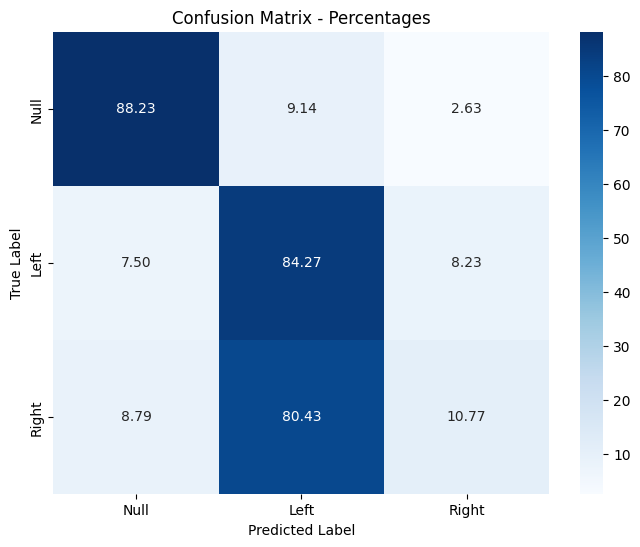

--------------------------------------------------------
Validating with "1 filters" and "128 layers"


Evaluating: 100%|██████████| 94/94 [00:05<00:00, 16.57it/s]

Accuracy: 38.93%


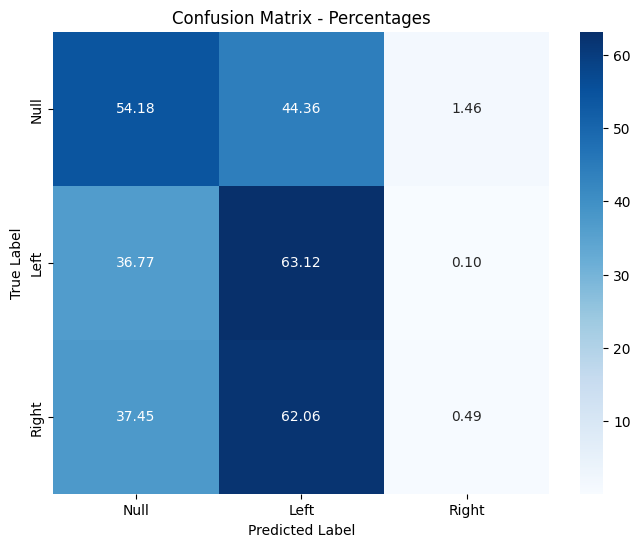

--------------------------------------------------------
Validating with "2 filters" and "128 layers"


Evaluating: 100%|██████████| 94/94 [00:11<00:00,  8.44it/s]

Accuracy: 54.07%


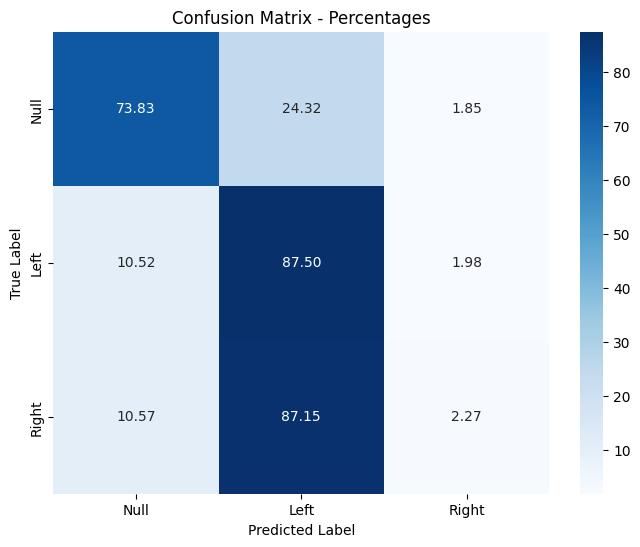

In [8]:
class_labels = [0, 1, 2]
for idx, model in enumerate(saved_models):
    num_layers, filters = combinations[idx]
    print("--------------------------------------------------------")
    print(f"Validating with \"{filters} filters\" and \"{num_layers} layers\"")
    with torch.no_grad():
        correct_predictions = 0
        true_labels = []
        predicted_labels = []
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Wrap the loop with tqdm to add a progress bar
        for inputs, labels in tqdm(val, total=len(val), desc="Evaluating"):
            outputs = model(inputs.to(device))
            true_labels.extend(labels.tolist())

            for idx, output in enumerate(outputs):
                predicted_label = torch.argmax(output)
                predicted_labels.append(predicted_label.item())

                # print(f"True Label: {labels[idx]}, Predicted Label: {predicted_label.item()}")

                if predicted_label.item() == labels[idx]:
                    correct_predictions += 1

        accuracy = correct_predictions / val_size
        print(f"Accuracy: {accuracy * 100:.2f}%")

    # Convert true and predicted labels to numpy arrays
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)


    # Create confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

    # Normalize the confusion matrix to get percentages
    conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Null", "Left", "Right"], yticklabels=["Null", "Left", "Right"])
    plt.title('Confusion Matrix - Percentages')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
